In [1]:
from PIL import ImageDraw, Image, ImageFont, ImageFilter

from colorthief import ColorThief

from IPython.display import display

import textwrap

In [2]:
corpus = 'Goodnight, I say to my beloved, as the fragments of my consciousness prepare to amalgamate themselves with the creatures that call the inky depths of night home. I know not what the morrow brings, but here I am, unable to choose between a night of blissful sleep and an illusory day where I get to dally with her.'

In [8]:
#imgAddress = '../Assets/placeholder.jpg'

imgAddress = '../Assets/unsplashImg.jpg'

place = Image.open(imgAddress, mode = 'r')
ct = ColorThief(imgAddress)

colors = ct.get_palette(color_count=6)

light = 0
dark = float('inf')

for i in colors:
    if sum(i) < dark:
        dark = sum(i)
        dark_color = i
    if sum(i) > light:
        light = sum(i)
        light_color = i

img = Image.new('RGB', (1500, 2100), color = light_color)

breadth, height = img.size
b, h = place.size

place = place.resize((1400, int(1400*h/b)))

try:
    place = place.crop((0, 0, 1400, 1355))
except:
    pass
img.paste(place, (50, 50))

draw = ImageDraw.Draw(img)
font = ImageFont.truetype('../Assets/PlayfairDisplay-Italic-VariableFont_wght.ttf', 50)  

wrapper = textwrap.TextWrapper(width=50) 
word_list = wrapper.wrap(text=corpus) 
caption_new = ''
for ii in word_list[:-1]:
    caption_new = caption_new + ii + '\n'
caption_new += word_list[-1]

textWidth, textHeight = draw.textsize(caption_new, font = font)

draw.text(xy = ((breadth - textWidth)/2, 1455), text = caption_new, font = font, fill = dark_color)

C:\Users\orect\AppData\Local\Temp\ipykernel_3168\3394356296.py:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  textWidth, textHeight = draw.textsize(caption_new, font = font)


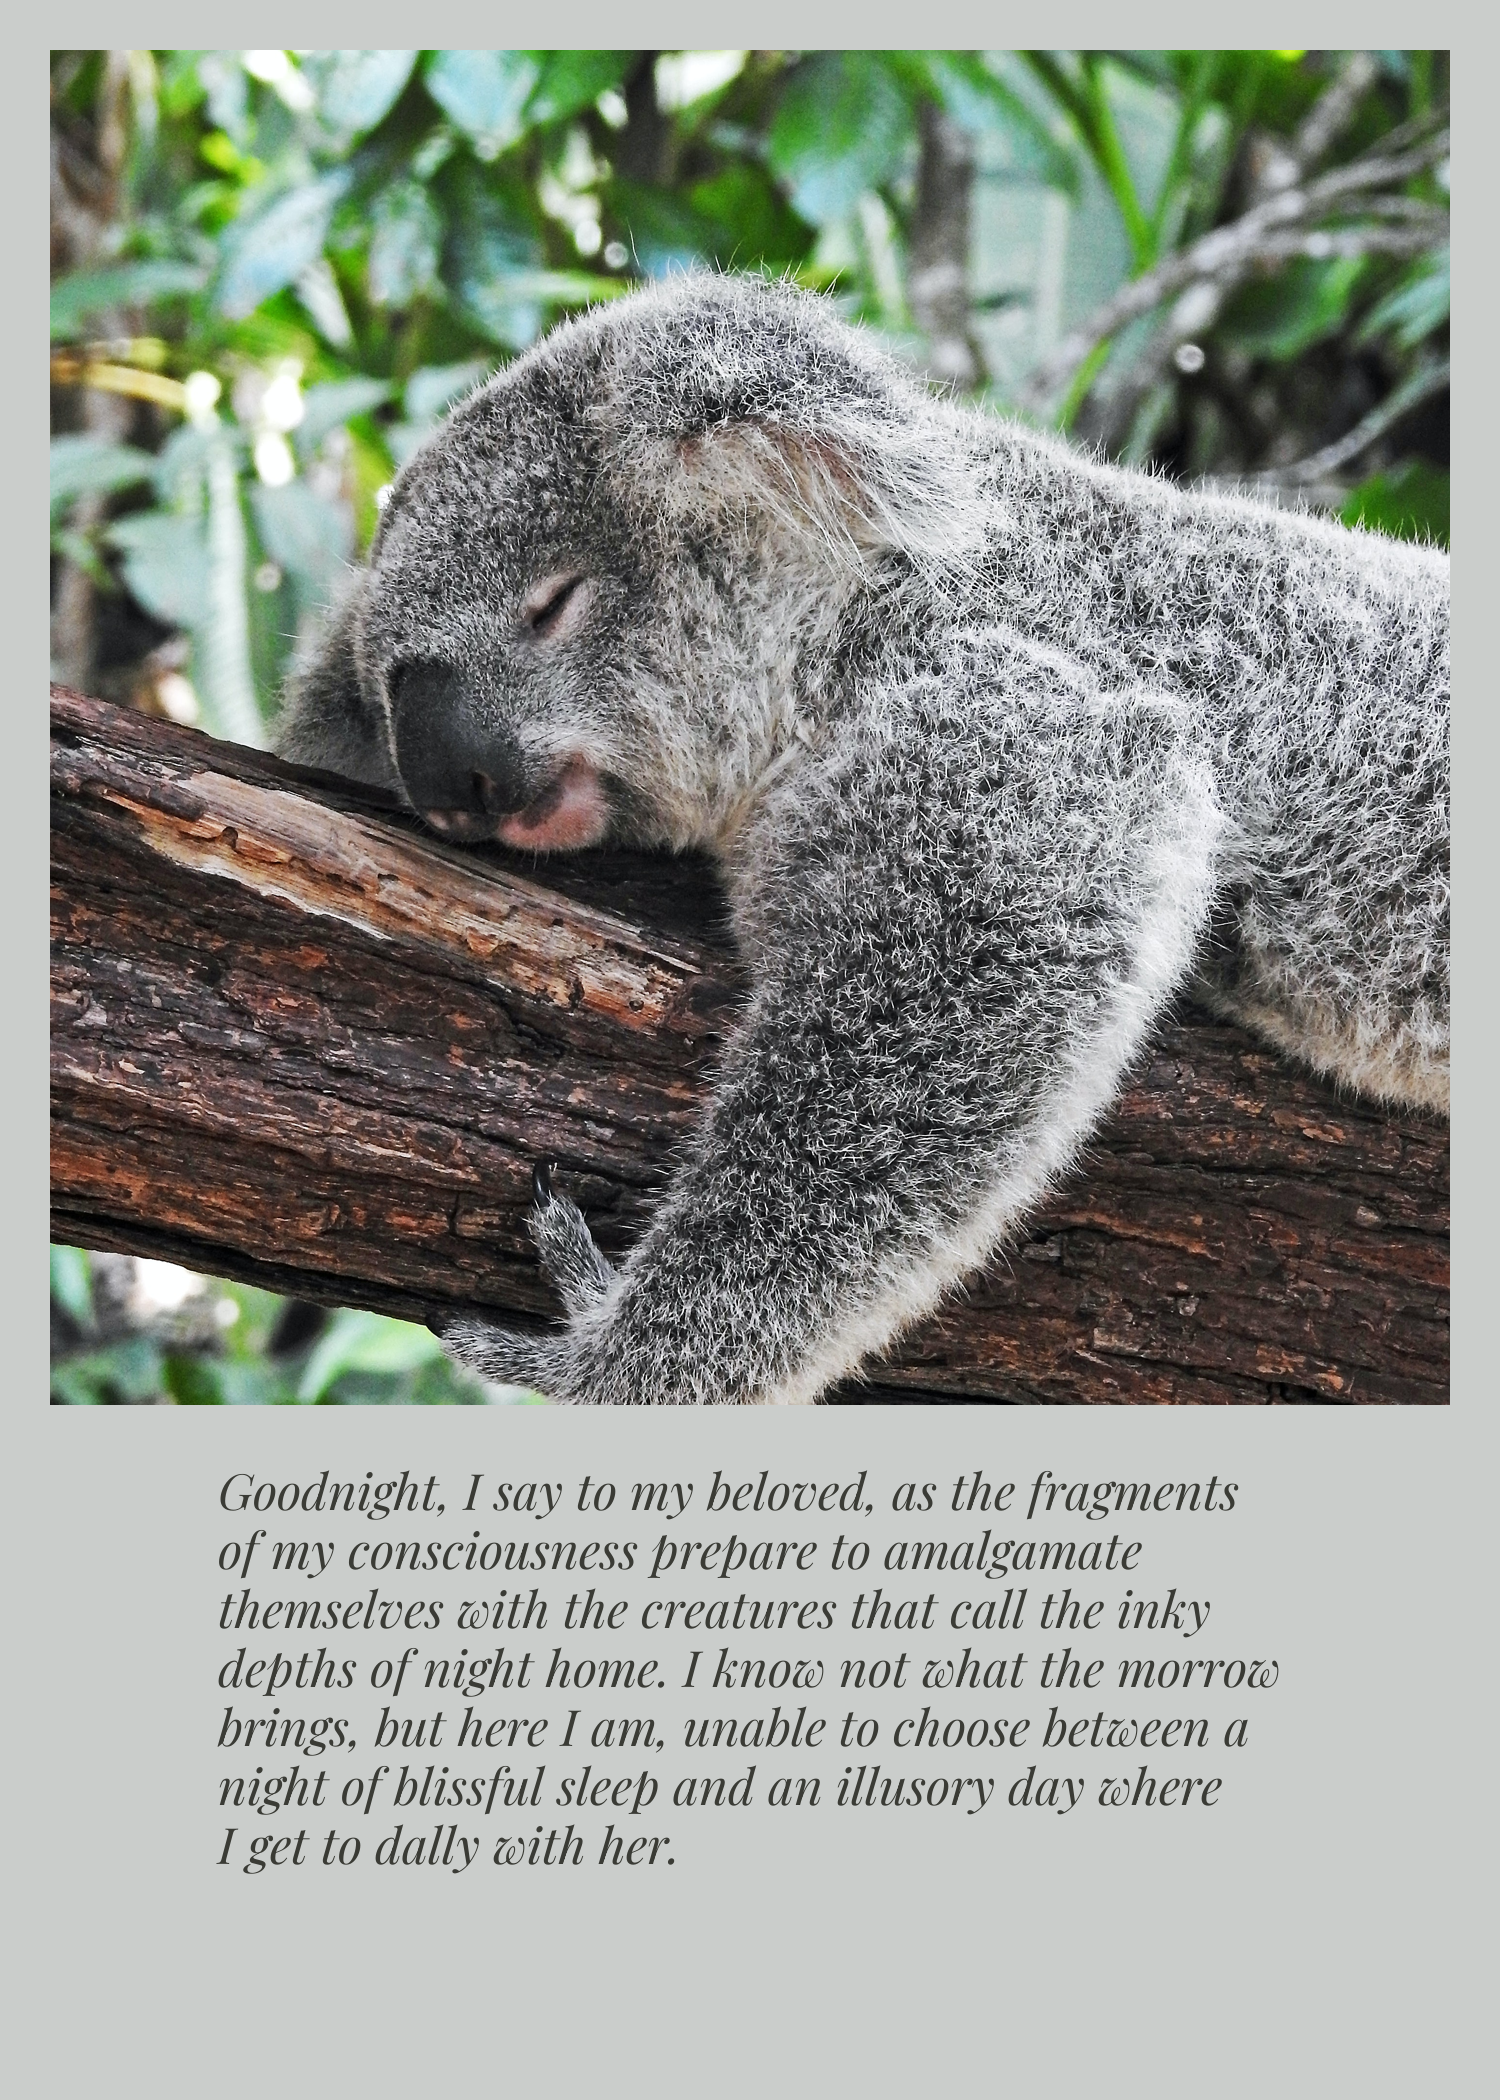

In [9]:
display(img)

In [10]:
img.save('../Assets/koala.png')